# Logistic Regression approach

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.linear_model

In [3]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.199921429184068
[[0.06355083 0.06008021 0.11869505 0.22073114 0.53694277]
 [0.0634242  0.06095313 0.11814081 0.22678957 0.53069229]
 [0.06212977 0.05943536 0.118316   0.22983655 0.53028232]
 [0.06158519 0.06032644 0.12030959 0.22380809 0.53397068]
 [0.06135487 0.06020615 0.11879084 0.22520202 0.53444612]]


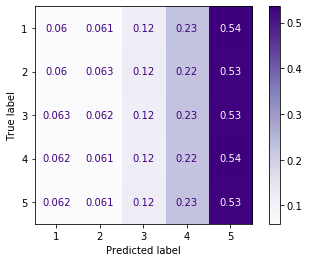

In [4]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

In [4]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, multi_class='N/A', C='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score,order_aware_error_1,order_aware_error_2,order_aware_error_3,order_aware_error_4,order_aware_error_5,order_aware_error_avg
0,baseline,full,count,None,N/A,N/A,0.357685,0.200609,3.313928,2.374911,1.678068,1.235029,1.906035,2.101594


In [5]:
classifier = sklearn.linear_model.LogisticRegression(n_jobs=4)
classifier.fit(train_as_vec, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
classifier.score(test_as_vec, test_targets)
common.get_score(classifier, test_as_vec, test_targets)

0.3900367706137717

In [ ]:
for sampling in ['random_downsampling', 'full', 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for preprocessing in [None, 'stem']:
            print(f'        preprocessing = {preprocessing}')
            for multi_class in ['ovr', 'multinomial']:
                with open('logistic-reg-tmp.csv', 'w') as f:
                    f.write(results_df.to_csv())
                print(f'            multi_class = {multi_class}')
                for C in [0.01, 0.05, 0.25, 0.5, 1, 5]:
                    print(f'                C = {C}')

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.linear_model.LogisticRegression(C=C, multi_class=multi_class, n_jobs=-1)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'N/A', sampling, representation, 
                                preprocessing, multi_class=multi_class, C=C)])

sampling = random_downsampling
    representation = count
        preprocessing = None
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
        preprocessing = stem
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
    representation = tf_idf
        preprocessing = None
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
              

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
        preprocessing = stem
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
    representation = tf_idf
        preprocessing = None
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05


In [13]:
results_df.sort_values('score', ascending=False).head(25)

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,oversampled,tf_idf,stem,ovr,0.05,0.594022,0.537067
0,N/A,oversampled,tf_idf,None,ovr,0.05,0.594411,0.537007
0,N/A,oversampled,tf_idf,None,ovr,0.25,0.594642,0.535219
0,N/A,oversampled,tf_idf,None,multinomial,0.05,0.584363,0.534739
0,N/A,oversampled,tf_idf,stem,ovr,0.25,0.594145,0.534547
0,N/A,oversampled,tf_idf,None,multinomial,0.25,0.579417,0.532982
0,N/A,oversampled,tf_idf,stem,multinomial,0.05,0.577553,0.532906
0,N/A,oversampled,tf_idf,stem,multinomial,1,0.578672,0.532825
0,N/A,random_downsampling,tf_idf,stem,ovr,0.5,0.588607,0.532721
0,N/A,random_downsampling,tf_idf,None,ovr,0.5,0.588466,0.532484


In [14]:
results_df.sort_values('real_world_acc', ascending=False)

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,full,tf_idf,None,multinomial,5,0.641792,0.477732
0,N/A,full,tf_idf,stem,ovr,1,0.641752,0.455516
0,N/A,full,tf_idf,None,ovr,1,0.641620,0.456016
0,N/A,full,tf_idf,stem,multinomial,5,0.641615,0.475584
0,N/A,full,tf_idf,stem,multinomial,1,0.641399,0.475429
...,...,...,...,...,...,...,...,...
0,N/A,random_downsampling,tf_idf,None,ovr,0.01,0.549693,0.486284
0,N/A,random_downsampling,tf_idf,stem,ovr,0.01,0.549532,0.485811
0,N/A,random_downsampling,tf_idf,None,multinomial,0.01,0.548095,0.492255
0,N/A,random_downsampling,tf_idf,stem,multinomial,0.01,0.547989,0.491848


In [7]:
results_df.sort_values('score', ascending=False).head(20)['representation'].value_counts()

count    1
Name: representation, dtype: int64

In [40]:
results_df.sort_values('real_world_acc', ascending=False).head(20)['representation'].value_counts()

tf_idf    18
count      2
Name: representation, dtype: int64

In [41]:
results_df.sort_values('score', ascending=False).head(20)['sampling'].value_counts()

oversampled            13
random_downsampling     7
Name: sampling, dtype: int64

In [42]:
results_df.sort_values('real_world_acc', ascending=False).head(20)['sampling'].value_counts()

full    20
Name: sampling, dtype: int64

## Representation <-> multiclass approach comparisons

In [15]:
tf_idf_ovr = results_df[
    (results_df['representation'] == 'tf_idf') &
    (results_df['multi_class'] == 'ovr')].sort_values('score', ascending=False)
tf_idf_ovr

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,oversampled,tf_idf,stem,ovr,0.05,0.594022,0.537067
0,N/A,oversampled,tf_idf,None,ovr,0.05,0.594411,0.537007
0,N/A,oversampled,tf_idf,None,ovr,0.25,0.594642,0.535219
0,N/A,oversampled,tf_idf,stem,ovr,0.25,0.594145,0.534547
0,N/A,random_downsampling,tf_idf,stem,ovr,0.5,0.588607,0.532721
0,N/A,random_downsampling,tf_idf,None,ovr,0.5,0.588466,0.532484
0,N/A,random_downsampling,tf_idf,None,ovr,0.25,0.588595,0.532249
0,N/A,random_downsampling,tf_idf,stem,ovr,0.25,0.588605,0.531848
0,N/A,oversampled,tf_idf,stem,ovr,0.5,0.594043,0.530748
0,N/A,random_downsampling,tf_idf,None,ovr,1,0.585777,0.529923


In [16]:
tf_idf_multi = results_df[
    (results_df['representation'] == 'tf_idf') &
    (results_df['multi_class'] == 'multinomial')].sort_values('score', ascending=False)
tf_idf_multi

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,oversampled,tf_idf,None,multinomial,0.05,0.584363,0.534739
0,N/A,oversampled,tf_idf,None,multinomial,0.25,0.579417,0.532982
0,N/A,oversampled,tf_idf,stem,multinomial,0.05,0.577553,0.532906
0,N/A,oversampled,tf_idf,stem,multinomial,1,0.578672,0.532825
0,N/A,oversampled,tf_idf,stem,multinomial,0.5,0.573252,0.532439
0,N/A,oversampled,tf_idf,None,multinomial,1,0.585280,0.532316
0,N/A,oversampled,tf_idf,None,multinomial,5,0.571002,0.532150
0,N/A,random_downsampling,tf_idf,None,multinomial,0.25,0.574850,0.531738
0,N/A,oversampled,tf_idf,stem,multinomial,0.25,0.575357,0.531652
0,N/A,oversampled,tf_idf,stem,multinomial,5,0.575133,0.531621


In [17]:
count_ovr = results_df[
    (results_df['representation'] == 'count') &
    (results_df['multi_class'] == 'ovr')].sort_values('score', ascending=False)
count_ovr

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,oversampled,count,None,ovr,0.01,0.604812,0.524507
0,N/A,oversampled,count,stem,ovr,1,0.604881,0.523841
0,N/A,oversampled,count,None,ovr,0.05,0.603476,0.523801
0,N/A,oversampled,count,None,ovr,1,0.605097,0.523705
0,N/A,oversampled,count,None,ovr,0.25,0.606434,0.523687
0,N/A,oversampled,count,stem,ovr,0.01,0.604096,0.523628
0,N/A,oversampled,count,stem,ovr,5,0.605293,0.523585
0,N/A,oversampled,count,stem,ovr,0.05,0.603837,0.523507
0,N/A,oversampled,count,None,ovr,0.5,0.604690,0.522942
0,N/A,oversampled,count,stem,ovr,0.5,0.605880,0.522835


In [18]:
count_multi = results_df[
    (results_df['representation'] == 'count') &
    (results_df['multi_class'] == 'ovr')].sort_values('score', ascending=False)
count_multi

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,oversampled,count,None,ovr,0.01,0.604812,0.524507
0,N/A,oversampled,count,stem,ovr,1,0.604881,0.523841
0,N/A,oversampled,count,None,ovr,0.05,0.603476,0.523801
0,N/A,oversampled,count,None,ovr,1,0.605097,0.523705
0,N/A,oversampled,count,None,ovr,0.25,0.606434,0.523687
0,N/A,oversampled,count,stem,ovr,0.01,0.604096,0.523628
0,N/A,oversampled,count,stem,ovr,5,0.605293,0.523585
0,N/A,oversampled,count,stem,ovr,0.05,0.603837,0.523507
0,N/A,oversampled,count,None,ovr,0.5,0.604690,0.522942
0,N/A,oversampled,count,stem,ovr,0.5,0.605880,0.522835


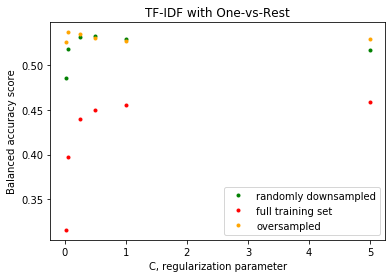

In [32]:
down_X = tf_idf_ovr[(tf_idf_ovr['preprocessing'] == 'stem') & (tf_idf_ovr['sampling'] == 'random_downsampling')]['C'].values
down_Y = tf_idf_ovr[(tf_idf_ovr['preprocessing'] == 'stem') & (tf_idf_ovr['sampling'] == 'random_downsampling')]['score'].values

full_X = tf_idf_ovr[(tf_idf_ovr['preprocessing'] == 'stem') & (tf_idf_ovr['sampling'] == 'full')]['C'].values
full_Y = tf_idf_ovr[(tf_idf_ovr['preprocessing'] == 'stem') & (tf_idf_ovr['sampling'] == 'full')]['score'].values

over_X = tf_idf_ovr[(tf_idf_ovr['preprocessing'] == 'stem') & (tf_idf_ovr['sampling'] == 'oversampled')]['C'].values
over_Y = tf_idf_ovr[(tf_idf_ovr['preprocessing'] == 'stem') & (tf_idf_ovr['sampling'] == 'oversampled')]['score'].values

plt.plot(stemmed_X, stemmed_Y, color='green', linestyle='', marker='.', label='randomly downsampled')
plt.plot(full_X, full_Y, color='red', linestyle='', marker='.', label='full training set')
plt.plot(over_X, over_Y, color='orange', linestyle='', marker='.', label='oversampled')


plt.xlabel('C, regularization parameter')
plt.ylabel('Balanced accuracy score')
plt.title('TF-IDF with One-vs-Rest')
plt.legend()

Text(0.5, 1.0, 'TF-IDF with Multinomial')

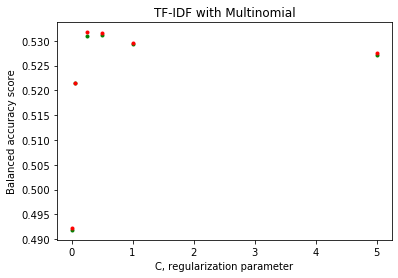

In [44]:
stemmed_X = tf_idf_multi[tf_idf_multi['preprocessing'] == 'stem']['C'].values
stemmed_Y = tf_idf_multi[tf_idf_multi['preprocessing'] == 'stem']['score'].values

dirty_X = tf_idf_multi[tf_idf_multi['preprocessing'] != 'stem']['C'].values
dirty_Y = tf_idf_multi[tf_idf_multi['preprocessing'] != 'stem']['score'].values

plt.plot(stemmed_X, stemmed_Y, color='green', linestyle='', marker='.')
plt.plot(dirty_X, dirty_Y, color='red', linestyle='', marker='.')

plt.xlabel('C, regularization parameter')
plt.ylabel('Balanced accuracy score')
plt.title('TF-IDF with Multinomial')

## Re-training the Top 10

In [80]:
results_df.sort_values('score', ascending=False).head(10)

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,oversampled,tf_idf,stem,ovr,0.05,0.594022,0.537067
0,N/A,oversampled,tf_idf,None,ovr,0.05,0.594411,0.537007
0,N/A,oversampled,tf_idf,None,ovr,0.25,0.594642,0.535219
0,N/A,oversampled,tf_idf,None,multinomial,0.05,0.584363,0.534739
0,N/A,oversampled,tf_idf,stem,ovr,0.25,0.594145,0.534547
0,N/A,oversampled,tf_idf,None,multinomial,0.25,0.579417,0.532982
0,N/A,oversampled,tf_idf,stem,multinomial,0.05,0.577553,0.532906
0,N/A,oversampled,tf_idf,stem,multinomial,1,0.578672,0.532825
0,N/A,random_downsampling,tf_idf,stem,ovr,0.5,0.588607,0.532721
0,N/A,random_downsampling,tf_idf,None,ovr,0.5,0.588466,0.532484


In [5]:
BEST = [
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': 'stem', 'multi_class': 'ovr', 'C': 0.05},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': None, 'multi_class': 'ovr', 'C': 0.05},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': None, 'multi_class': 'ovr', 'C': 0.25},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': None, 'multi_class': 'multinomial', 'C': 0.05},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': 'stem', 'multi_class': 'ovr', 'C': 0.25},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': None, 'multi_class': 'multinomial','C': 0.25},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': 'stem',	'multi_class': 'multinomial', 'C': 0.05},
    {'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': 'stem', 'multi_class': 'multinomial', 'C': 1},
    {'sampling': 'random_downsampling', 'representation': 'tf_idf', 'preprocessing':	'stem', 'multi_class':	'ovr', 'C': 0.5},
    {'sampling': 'random_downsampling', 'representation': 'tf_idf', 'preprocessing':	'None', 'multi_class':	'ovr', 'C': 0.5},
]

In [ ]:
best_res = []

for idx, estimator in enumerate(BEST):
    sampling = estimator['sampling']
    representation = estimator['representation']
    preprocessing = estimator['preprocessing']
    multi_class = estimator['multi_class']
    C = estimator['C']
    
    single_res = {
        'sampling': sampling,
        'representation': representation,
        'preprocessing': preprocessing,
        'multi_class': multi_class,
        'C': C,
    }
    print(single_res)
    
    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)
    
    classifier = sklearn.linear_model.LogisticRegression(C=C, multi_class=multi_class, n_jobs=-1, max_iter=1_000)
    classifier.fit(train_as_vec, train_targets)

    best_res.append(
        common.perf_row(
        classifier, test_as_vec, test_targets,
        'N/A', sampling, representation, 
        preprocessing, multi_class=multi_class, C=C))

{'sampling': 'oversampled', 'representation': 'tf_idf', 'preprocessing': 'stem', 'multi_class': 'ovr', 'C': 0.05}


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
pd.DataFrame(best_res).sort_values('score', ascending=False)

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score,order_aware_error_1,order_aware_error_2,order_aware_error_3,order_aware_error_4,order_aware_error_5,order_aware_error_avg
3,N/A,oversampled,tf_idf,None,multinomial,0.05,0.588100,0.538411,1.663587,1.231656,1.275698,1.214740,1.614087,1.399954
6,N/A,oversampled,tf_idf,stem,multinomial,0.05,0.588239,0.538396,1.668603,1.232676,1.276805,1.215039,1.614866,1.401598
1,N/A,oversampled,tf_idf,None,ovr,0.05,0.594793,0.537393,1.744238,1.243691,1.314295,1.224330,1.674251,1.440161
0,N/A,oversampled,tf_idf,stem,ovr,0.05,0.594816,0.537296,1.745687,1.244791,1.314404,1.224543,1.675161,1.440917
5,N/A,oversampled,tf_idf,None,multinomial,0.25,0.590228,0.536242,1.636626,1.221162,1.270585,1.200457,1.585401,1.382846
4,N/A,oversampled,tf_idf,stem,ovr,0.25,0.595983,0.534718,1.713996,1.233039,1.304043,1.216783,1.656365,1.424845
2,N/A,oversampled,tf_idf,None,ovr,0.25,0.595742,0.534602,1.712365,1.231587,1.303738,1.216670,1.655297,1.423931
8,N/A,random_downsampling,tf_idf,stem,ovr,0.50,0.589125,0.532989,1.773292,1.262933,1.304272,1.219807,1.624265,1.436914
7,N/A,oversampled,tf_idf,stem,multinomial,1.00,0.585845,0.525168,1.646983,1.223680,1.270507,1.199045,1.583984,1.384840


## Winners (retrained)!

In [7]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
    'oversampled', 'tf_idf', None)

best_logreg = sklearn.linear_model.LogisticRegression(C=0.05, multi_class='multinomial', n_jobs=-1, max_iter=1_000)
best_logreg.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
best_ever = best_logreg

In [4]:
best_on_100 = best_logreg

In [6]:
best_on_100.n_iter_

array([100], dtype=int32)

SCORE: 0.5347389292949024
[[0.67152553 0.20777418 0.05903903 0.02036094 0.04130032]
 [0.24600902 0.42678957 0.23510492 0.04910767 0.04298882]
 [0.07490837 0.18258544 0.46381377 0.19603764 0.08265478]
 [0.03597324 0.04700032 0.2227782  0.4247818  0.26946644]
 [0.03610513 0.01971821 0.05819147 0.1992012  0.68678398]]


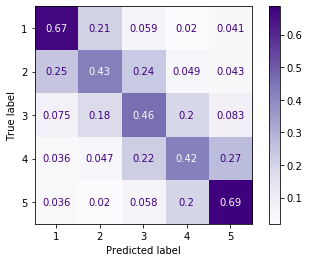

In [5]:
common.display_classifier_performance(best_on_100, test_as_vec, test_targets)

SCORE: 0.5384108397384733
[[0.67445627 0.20923955 0.05572266 0.02144069 0.03914083]
 [0.25020592 0.43549716 0.22333791 0.05114728 0.03981173]
 [0.07494799 0.19045072 0.4458841  0.21089648 0.0778207 ]
 [0.03480812 0.04832149 0.20596711 0.45078906 0.26011422]
 [0.03386513 0.01932499 0.05292946 0.20845281 0.68542761]]


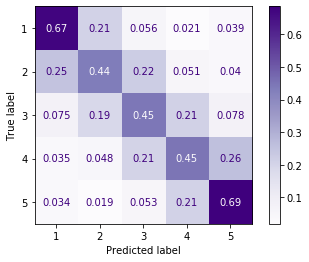

In [9]:
common.display_classifier_performance(best_ever, test_as_vec, test_targets)

In [10]:
common.get_score(best_on_100, test_as_vec, test_targets), common.get_score(best_ever, test_as_vec, test_targets)

(0.5347389292949024, 0.5384108397384733)

In [11]:
best_ever.n_iter_

array([545], dtype=int32)

In [26]:
print('class #1')
best_ever.coef_[0][np.argsort(best_ever.coef_[0])[::-1]][:100]

class #1


array([9.04916938, 7.60013229, 6.75359604, 6.72307355, 6.18924873,
       5.81878883, 5.77800403, 5.62009935, 5.44834771, 4.93575031,
       4.79572379, 4.78588489, 4.75473342, 4.67725963, 4.64831563,
       4.40900382, 4.29383417, 4.27510145, 4.26633543, 4.26285996,
       4.26179294, 4.12273177, 4.1165494 , 4.10966017, 4.0681299 ,
       4.04332449, 4.02034848, 3.97076071, 3.94144183, 3.91998281,
       3.80022294, 3.79970077, 3.76153108, 3.76138631, 3.70663614,
       3.69665173, 3.6941896 , 3.66768131, 3.65222731, 3.58571744,
       3.58282287, 3.57054024, 3.53012931, 3.29114366, 3.24735696,
       3.23402199, 3.22559238, 3.2244981 , 3.20350003, 3.1902442 ,
       3.16358168, 3.05636031, 3.05044201, 3.03135554, 2.9902475 ,
       2.93673284, 2.93421583, 2.89367884, 2.88554518, 2.87710714,
       2.84888537, 2.84150641, 2.80779789, 2.80758119, 2.80564407,
       2.78366941, 2.77334928, 2.74927039, 2.74895589, 2.68368713,
       2.67478874, 2.67139427, 2.66159018, 2.64852079, 2.62357

In [27]:
print('class #2')
best_ever.coef_[1][np.argsort(best_ever.coef_[1])[::-1]][:100]

class #2


array([5.4008191 , 4.81756718, 4.59817512, 4.44908293, 4.29177421,
       4.16190849, 4.10252269, 3.78927835, 3.75046416, 3.50843498,
       3.47034029, 3.43531092, 3.40438776, 3.38270695, 3.18728177,
       3.15784094, 3.14713737, 3.13833072, 3.1177133 , 3.07398991,
       3.02981481, 2.98712124, 2.96269672, 2.90173519, 2.85712138,
       2.80261169, 2.75021134, 2.74306503, 2.71200466, 2.67013827,
       2.6542993 , 2.65009092, 2.64786014, 2.61668916, 2.59128042,
       2.58446301, 2.56931224, 2.56240063, 2.53365045, 2.49856391,
       2.47309811, 2.44859068, 2.4348211 , 2.41756641, 2.38009425,
       2.35810698, 2.33397077, 2.31432574, 2.31291664, 2.30216619,
       2.23310388, 2.22937856, 2.21500808, 2.20293152, 2.17294298,
       2.15951284, 2.15899588, 2.1276384 , 2.12629467, 2.12068722,
       2.08956114, 2.07879204, 2.04110773, 2.02649682, 2.01934392,
       2.01374537, 1.99639711, 1.99609313, 1.99493783, 1.99235403,
       1.98610154, 1.97616535, 1.96902307, 1.95888325, 1.95232

In [28]:
print('class #3')
best_ever.coef_[2][np.argsort(best_ever.coef_[2])[::-1]][:100]

class #3


array([4.84745122, 4.55308423, 4.36832776, 3.75896641, 3.51963808,
       2.97525522, 2.96255263, 2.8532759 , 2.77677403, 2.67065357,
       2.56859372, 2.50456634, 2.4772695 , 2.42607056, 2.36772399,
       2.35151183, 2.31900677, 2.31657459, 2.28807227, 2.14346082,
       2.0953932 , 2.09196863, 1.99133299, 1.98522616, 1.97565597,
       1.94493217, 1.9285374 , 1.87659757, 1.85024826, 1.82492628,
       1.82288341, 1.80233344, 1.7700443 , 1.73582946, 1.71363467,
       1.68970194, 1.685444  , 1.67161086, 1.66835782, 1.64969205,
       1.64270104, 1.62677979, 1.61269664, 1.59092082, 1.58241809,
       1.57623339, 1.54108733, 1.5352811 , 1.53516999, 1.51336966,
       1.49040847, 1.47169691, 1.46137314, 1.45961138, 1.4571238 ,
       1.45347422, 1.45175836, 1.39335586, 1.38910869, 1.37866573,
       1.37855562, 1.37513434, 1.36788429, 1.36707745, 1.35244377,
       1.35096465, 1.34972679, 1.34121431, 1.33026726, 1.29628507,
       1.29118943, 1.26777357, 1.25989603, 1.25665063, 1.25541

In [29]:
print('class #4')
best_ever.coef_[3][np.argsort(best_ever.coef_[3])[::-1]][:100]

class #4


array([4.56824848, 3.91876555, 3.82131611, 3.70859466, 3.57750685,
       3.53787009, 3.45595225, 3.32016157, 3.28117633, 3.22840473,
       3.0694779 , 2.92435373, 2.80259966, 2.75830113, 2.68814828,
       2.59233255, 2.58840886, 2.52224672, 2.51743697, 2.38689883,
       2.33355264, 2.28456494, 2.28432446, 2.26159165, 2.21891494,
       2.14848924, 2.14441895, 2.13457511, 2.13239085, 2.1234    ,
       2.0966405 , 2.0920459 , 2.03870912, 2.03727496, 2.03067593,
       1.96024084, 1.94888658, 1.92470002, 1.9113762 , 1.87583109,
       1.86573102, 1.84807444, 1.84331763, 1.81954302, 1.81542654,
       1.81463745, 1.79984054, 1.79894433, 1.78943188, 1.7718212 ,
       1.75635731, 1.74546084, 1.72682893, 1.71262459, 1.70690081,
       1.70286223, 1.69444181, 1.69390631, 1.68858198, 1.68694324,
       1.68125303, 1.66211548, 1.64047916, 1.62814311, 1.62024116,
       1.58360557, 1.58357191, 1.57952816, 1.55048156, 1.54140866,
       1.54006123, 1.53587407, 1.51903459, 1.51428943, 1.51076

In [30]:
print('class #5')
best_ever.coef_[4][np.argsort(best_ever.coef_[4])[::-1]][:100]

class #5


array([6.58845381, 6.10817781, 5.51950457, 5.15733975, 4.99956434,
       4.87119382, 4.81787192, 4.76753021, 4.64272118, 4.49831731,
       4.32131366, 4.22506414, 4.136261  , 4.01330704, 3.68929136,
       3.45654045, 3.45650144, 3.40944241, 3.31531591, 3.2254786 ,
       3.13618015, 3.09466114, 2.99940254, 2.98500126, 2.9469962 ,
       2.93926942, 2.86686371, 2.76077467, 2.73462438, 2.73140436,
       2.64285472, 2.59590246, 2.57088864, 2.54702773, 2.54627171,
       2.54254496, 2.53469732, 2.53147009, 2.49078049, 2.4315117 ,
       2.42136609, 2.38834693, 2.35050367, 2.31190623, 2.31090118,
       2.29425392, 2.29252532, 2.28566448, 2.21923641, 2.21082567,
       2.19901465, 2.19776473, 2.17505843, 2.16162818, 2.1523759 ,
       2.10757961, 2.09296578, 2.08537673, 2.07542814, 2.06643189,
       2.05113081, 2.04919646, 2.04044312, 2.02742957, 2.02309295,
       2.01920927, 2.01691927, 1.9975896 , 1.98526523, 1.98200271,
       1.93865157, 1.92846386, 1.92277426, 1.91470863, 1.89871

In [54]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
    'random_downsampling', 'count', None)

classifier = sklearn.linear_model.LogisticRegression(C=0.01, multi_class='ovr', n_jobs=-1)
classifier.fit(train_as_vec, train_targets)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
classifier.score(test_as_vec, test_targets)

0.603992289710817

SCORE: 0.5193708676768637
[[0.71448404 0.13134351 0.05996452 0.02437143 0.0698365 ]
 [0.31151206 0.33477152 0.21784664 0.06267896 0.07319082]
 [0.09309559 0.15334324 0.410421   0.20697375 0.13616642]
 [0.03860518 0.04095623 0.18323676 0.37517035 0.36203148]
 [0.03240714 0.01389509 0.04757024 0.1441201  0.76200743]]


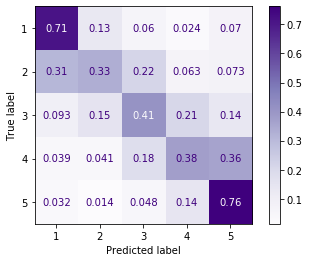

In [60]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)